In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df=pd.read_csv('../dataset/train.csv')
test_df=pd.read_csv('../dataset/test2.csv')

In [4]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train_df=train_df.iloc[:,1:]
test_df=test_df.iloc[:,1:]

In [7]:
train_df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
train_df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [9]:
test_df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [10]:
# set high at Canned
for i in np.where((train_df['Item_Type']=='Canned')|
                  (train_df['Item_Type']=='Soft Drinks')|
                  (train_df['Item_Type']=='Baking Goods')|
                  (train_df['Item_Type']=='Hard Drinks')):
    train_df.loc[i,'Outlet_Size']='High'

In [11]:
# set Medium at Others ans snack foods
for i in np.where( (train_df['Item_Type']=='Frozen Foods')| 
                  (train_df['Item_Type']=='Meat') | 
                  (train_df['Item_Type']=='Others')|
                  (train_df['Item_Type']=='Household')|
                  (train_df['Item_Type']=='Seafood')):
    train_df.loc[i,'Outlet_Size']='Medium'

In [12]:
# set Medium at Others ans snack foods
for i in np.where((train_df['Item_Type']=='Snack Foods')|
                  (train_df['Item_Type']=='Dairy') |
                  (train_df['Item_Type']=='Breads')|
                  (train_df['Item_Type']=='Fruits and Vegetables')|
                  (train_df['Item_Type']=='Health and Hygiene')|
                  (train_df['Item_Type']=='Breakfast')|
                  (train_df['Item_Type']=='Starchy Foods')):
    train_df.loc[i,'Outlet_Size']='Small'

In [13]:
train_df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
train_df['Item_Weight'].mean()

12.857645184135976

In [15]:
train_df['Item_Weight']=train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean())

In [16]:
train_df.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [18]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,High,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052


In [19]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
for i in np.where((df['Item_Fat_Content']=="LF") | 
               (df['Item_Fat_Content']=='low fat')):
    df.loc[i,'Item_Fat_Content']='Low Fat'

In [21]:
for i in np.where(df['Item_Fat_Content']=="reg"):
    df.loc[i,'Item_Fat_Content']='Regular'

In [22]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [23]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [24]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,High,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052


In [25]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,High,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052


In [26]:
print('shape :',df.shape)
df.isnull().sum()

shape : (13173, 11)


Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
df['Item_Type']=labelencoder.fit_transform(df['Item_Type'])

In [29]:
import pickle

pickle.dump(labelencoder,open('../models/Item_Type_encoder.pkl','wb'))

In [30]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [31]:
from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder(categories=[['Low Fat', 'Regular']])
df['Item_Fat_Content']=encoder.fit_transform(df[['Item_Fat_Content']])

In [32]:
pickle.dump(encoder,open("../models/Item_Fat_Content_encoder.pkl","wb"))

In [33]:
df['Outlet_Size'].unique()

array(['Small', 'High', 'Medium'], dtype=object)

In [34]:
encoder=OrdinalEncoder(categories=[['Small','Medium','High']])
df['Outlet_Size']=encoder.fit_transform(df[['Outlet_Size']])

In [35]:
pickle.dump(encoder,open("../models/Outlet_Size_encoder.pkl","wb"))

In [36]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [37]:
encoder=OrdinalEncoder(categories=[['Tier 3', 'Tier 2','Tier 1']])
df['Outlet_Location_Type']=encoder.fit_transform(df[['Outlet_Location_Type']])

In [38]:
pickle.dump(encoder,open("../models/Outlet_Location_Type_encoder.pkl","wb"))

In [39]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [40]:
encoder=OrdinalEncoder(categories=[['Grocery Store','Supermarket Type1', 'Supermarket Type2', 
       'Supermarket Type3']])
df['Outlet_Type']=encoder.fit_transform(df[['Outlet_Type']])

In [41]:
pickle.dump(encoder,open("../models/Outlet_Type_encoder.pkl","wb"))

In [42]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [43]:
encoder=OrdinalEncoder(categories=[['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027','OUT035',
                                    'OUT045', 'OUT046','OUT049' ]])
df['Outlet_Identifier']=encoder.fit_transform(df[['Outlet_Identifier']])

In [62]:
encoder.transform([['OUT013']])

c:\Users\Yash Dholakiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[1.]])

In [45]:
pickle.dump(encoder,open("../models/Outlet_Identifier_encoder.pkl","wb"))

In [46]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0.0,0.016047,4,249.8092,9.0,1999,0.0,2.0,1.0,3735.1380
1,5.92,1.0,0.019278,14,48.2692,3.0,2009,2.0,0.0,2.0,443.4228
2,17.50,0.0,0.016760,10,141.6180,9.0,1999,1.0,2.0,1.0,2097.2700
3,19.20,1.0,0.000000,6,182.0950,0.0,1998,0.0,0.0,0.0,732.3800
4,8.93,0.0,0.000000,9,53.8614,1.0,1987,1.0,0.0,1.0,994.7052


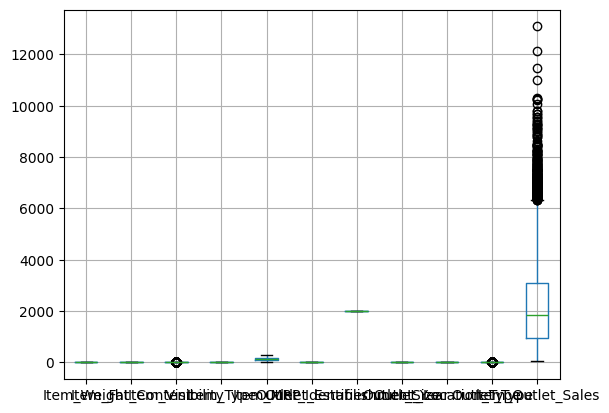

<Figure size 10000x10000 with 0 Axes>

In [47]:
# Visual inspection (box plot)
import matplotlib.pyplot as plt
df.boxplot()
plt.figure(figsize=(100, 100))
plt.show()

In [48]:
df.shape

(13173, 11)

In [49]:
# 1. Standard Deviation Method
mean = df['Item_Outlet_Sales'].mean()
std_dev = df['Item_Outlet_Sales'].std()
threshold = 3
df = df[(df['Item_Outlet_Sales'] >= mean - threshold * std_dev) & (df['Item_Outlet_Sales'] <= mean + threshold * std_dev)]

In [50]:
q1 = df['Item_Outlet_Sales'].quantile(0.25)
q3 = df['Item_Outlet_Sales'].quantile(0.75)
iqr = q3 - q1
k = 1.5
df = df[(df['Item_Outlet_Sales'] >= q1 - k * iqr) & (df['Item_Outlet_Sales'] <= q3 + k * iqr)]

In [51]:
# Z-Score Method
# Compute Z-scores for each value in the 'Value' column
df['Z_score'] = (df['Item_Outlet_Sales'] - df['Item_Outlet_Sales'].mean()) / df['Item_Outlet_Sales'].std()

# Define a threshold for Z-score (e.g., 3)
threshold = 3

# Filter out rows where the absolute Z-score exceeds the threshold
df_cleaned = df[abs(df['Z_score']) < threshold]

# Drop the Z-score column if no longer needed
df = df_cleaned.drop(columns=['Z_score'])

In [52]:
df.shape

(12866, 11)

In [53]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0.0,0.016047,4,249.8092,9.0,1999,0.0,2.0,1.0,3735.1380
1,5.92,1.0,0.019278,14,48.2692,3.0,2009,2.0,0.0,2.0,443.4228
2,17.50,0.0,0.016760,10,141.6180,9.0,1999,1.0,2.0,1.0,2097.2700
3,19.20,1.0,0.000000,6,182.0950,0.0,1998,0.0,0.0,0.0,732.3800
4,8.93,0.0,0.000000,9,53.8614,1.0,1987,1.0,0.0,1.0,994.7052


In [54]:
df_cleaned.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Z_score
0,9.30,0.0,0.016047,4,249.8092,9.0,1999,0.0,2.0,1.0,3735.1380,1.138344
1,5.92,1.0,0.019278,14,48.2692,3.0,2009,2.0,0.0,2.0,443.4228,-1.142102
2,17.50,0.0,0.016760,10,141.6180,9.0,1999,1.0,2.0,1.0,2097.2700,0.003656
3,19.20,1.0,0.000000,6,182.0950,0.0,1998,0.0,0.0,0.0,732.3800,-0.941917
4,8.93,0.0,0.000000,9,53.8614,1.0,1987,1.0,0.0,1.0,994.7052,-0.760182


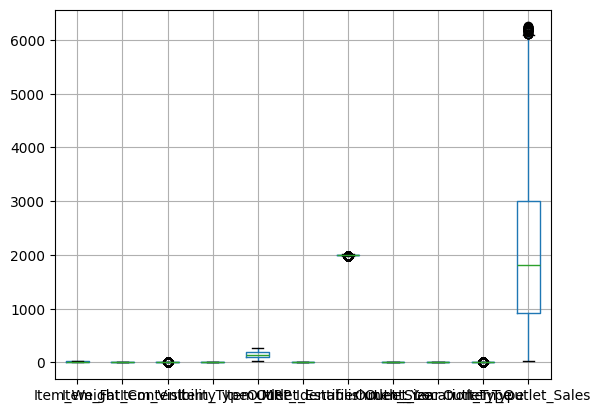

<Figure size 10000x10000 with 0 Axes>

In [55]:
# Visual inspection (box plot)
import matplotlib.pyplot as plt
df.boxplot()
plt.figure(figsize=(100, 100))
plt.show()

In [63]:
df=df.drop('Outlet_Identifier',axis=1)

In [64]:
df.to_csv('../dataset/Stores Sales.csv',index=False)